In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [100]:
tweet = pd.read_csv('C:\\Users\\rishi\\Desktop\\Semester 2\\ADS(sec 06)\\Assignment 1\\Datasets\\twitter-airline-sentiment\\Tweets_final.csv', index_col = 0)
#Loading the Dataset

In [77]:
tweet.shape #There are 11 columns and 4705 rows in the Dataset.

(4705, 11)

In [78]:
print(tweet)

             airline_sentiment  airline_sentiment_confidence  \
tweet_id                                                       
5.702820e+17          negative                        0.6842   
5.702770e+17          negative                        1.0000   
5.702570e+17          negative                        1.0000   
5.700880e+17          negative                        1.0000   
5.700360e+17          negative                        1.0000   
5.700250e+17          negative                        0.6688   
5.699960e+17          negative                        0.6939   
5.699890e+17          negative                        1.0000   
5.699770e+17          negative                        1.0000   
5.699740e+17          negative                        1.0000   
5.699670e+17          negative                        1.0000   
5.699270e+17          negative                        1.0000   
5.699190e+17          negative                        1.0000   
5.699110e+17          negative          

In [57]:
tweet.describe()

,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,4705.000000,4705.000000,4705.000000
mean,0.930696,0.728429,0.088417
std,0.140364,0.238508,0.542657
min,0.339400,0.312200,0.000000
25%,1.000000,0.643700,0.000000
50%,1.000000,0.679700,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000


In [ ]:
From this we can infer that majority of the tweets are not retweeted. Hence, most of the tweets are unique
and not dependent on each other as the retweet count of 0 is 4395 out of 4705.

In [58]:
tweet['retweet_count'].value_counts(dropna=False)

0     4395
1      270
2       22
4        8
3        6
7        1
22       1
18       1
5        1
Name: retweet_count, dtype: int64

In [59]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4705 entries, 5.70282e+17 to 5.69587e+17
Data columns (total 11 columns):
airline_sentiment               4705 non-null object
airline_sentiment_confidence    4705 non-null float64
negativereason                  4705 non-null object
negativereason_confidence       4705 non-null float64
airline                         4705 non-null object
name                            4705 non-null object
retweet_count                   4705 non-null int64
text                            4705 non-null object
tweet_created                   4705 non-null object
tweet_location                  4705 non-null object
user_timezone                   4705 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 441.1+ KB


In [60]:
tweet.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,
5.702820e+17,negative,0.6842,Late Flight,0.3684,Virgin America,smartwatermelon,0,@VirginAmerica SFO-PDX schedule is still MIA.,2/24/15 10:01,"palo alto, ca",Pacific Time (US & Canada)
5.702770e+17,negative,1.0000,Bad Flight,1.0000,Virgin America,heatherovieda,0,@VirginAmerica I flew from NYC to SFO last we...,2/24/15 9:39,this place called NYC,Eastern Time (US & Canada)
5.702570e+17,negative,1.0000,Customer Service Issue,0.3557,Virgin America,ayeevickiee,0,@VirginAmerica you guys messed up my seating.....,2/24/15 8:18,714,Mountain Time (US & Canada)
5.700880e+17,negative,1.0000,Customer Service Issue,1.0000,Virgin America,Cuschoolie1,0,"@VirginAmerica help, left expensive headphones...",2/23/15 21:10,Washington DC,Quito
5.700360e+17,negative,1.0000,Customer Service Issue,1.0000,Virgin America,DannyDouglass,0,@VirginAmerica Your chat support is not workin...,2/23/15 17:41,"San Francisco, CA",Pacific Time (US & Canada)


In [61]:
tweet.tail()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,
5.695890e+17,negative,1.0,Late Flight,1.0000,American,cataattack,0,@AmericanAir Flight 953 NYC-Buenos Aires has b...,2/22/15 12:08,"Buenos Aires, Argentina",Buenos Aires
5.695890e+17,negative,1.0,Customer Service Issue,1.0000,American,jontgreen89,0,@AmericanAir How do I change my flight if the ...,2/22/15 12:04,"Waco, TX",Central Time (US & Canada)
5.695880e+17,negative,1.0,Bad Flight,1.0000,American,MDDavis7,0,@AmericanAir thx for nothing on getting us out...,2/22/15 12:04,US,Eastern Time (US & Canada)
5.695880e+17,negative,1.0,Cancelled Flight,1.0000,American,RussellsWriting,0,@AmericanAir my flight was Cancelled Flightled...,2/22/15 12:01,Los Angeles,Arizona
5.695870e+17,negative,1.0,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2/22/15 11:59,New Jersey,Eastern Time (US & Canada)


In [62]:
tweet.columns

Index(['airline_sentiment', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'name', 'retweet_count', 'text',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

In [148]:
tweet['airline_sentiment_confidence'].value_counts(dropna=False)
#tweet['negativereason_confidence'].value_counts(dropna=False)

1.0000    3748
0.6667      13
0.6632      10
0.6598      10
0.6559       9
0.6515       7
0.6737       7
0.6701       7
0.6596       7
0.6939       6
0.6774       6
0.6842       6
0.6739       6
0.6652       6
0.6721       6
0.6566       6
0.6735       5
0.6563       5
0.6966       5
0.6688       5
0.6458       5
0.6421       5
0.6669       5
0.6522       5
0.6832       4
0.6703       4
0.7087       4
0.6495       4
0.6630       4
0.6803       4
          ... 
0.6651       1
0.6589       1
0.6339       1
0.6862       1
0.6906       1
0.6419       1
0.3435       1
0.6805       1
0.7148       1
0.6518       1
0.6391       1
0.6734       1
0.7102       1
0.7059       1
0.6947       1
0.6461       1
0.6503       1
0.6543       1
0.6397       1
0.6897       1
0.6534       1
0.6736       1
0.6715       1
0.6389       1
0.6766       1
0.7257       1
0.6779       1
0.6666       1
0.6926       1
0.6609       1
Name: airline_sentiment_confidence, Length: 526, dtype: int64

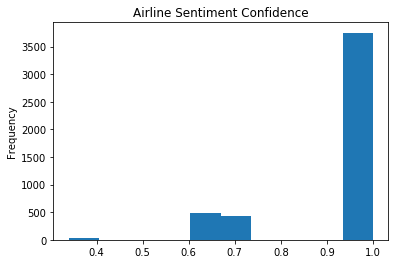

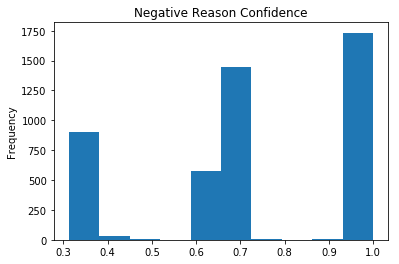

In [144]:
tweet.airline_sentiment_confidence.plot('hist')
plt.title('Airline Sentiment Confidence')
plt.show()

tweet.negativereason_confidence.plot('hist')
plt.title('Negative Reason Confidence')
plt.show()

In [101]:
tweet["tweet_created"] = tweet["tweet_created"].astype("datetime64[ns]") 
#Converting DateTime to Date format of "English(United Kingdom)" (YYYY-MM-DD).

In [102]:
tweet.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,
5.702820e+17,negative,0.6842,Late Flight,0.3684,Virgin America,smartwatermelon,0,@VirginAmerica SFO-PDX schedule is still MIA.,2015-02-24,"palo alto, ca",Pacific Time (US & Canada)
5.702770e+17,negative,1.0000,Bad Flight,1.0000,Virgin America,heatherovieda,0,@VirginAmerica I flew from NYC to SFO last we...,2015-02-24,this place called NYC,Eastern Time (US & Canada)
5.702570e+17,negative,1.0000,Customer Service Issue,0.3557,Virgin America,ayeevickiee,0,@VirginAmerica you guys messed up my seating.....,2015-02-24,714,Mountain Time (US & Canada)
5.700880e+17,negative,1.0000,Customer Service Issue,1.0000,Virgin America,Cuschoolie1,0,"@VirginAmerica help, left expensive headphones...",2015-02-23,Washington DC,Quito
5.700360e+17,negative,1.0000,Customer Service Issue,1.0000,Virgin America,DannyDouglass,0,@VirginAmerica Your chat support is not workin...,2015-02-23,"San Francisco, CA",Pacific Time (US & Canada)


In [104]:
tweet.isnull().sum() #checking if there are any null values

airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
name                            0
retweet_count                   0
text                            0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64

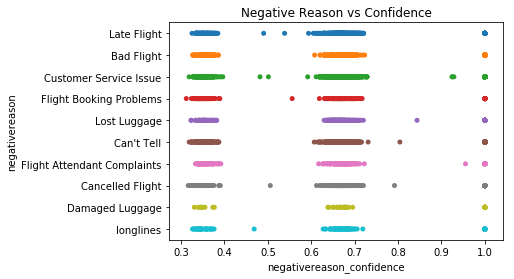

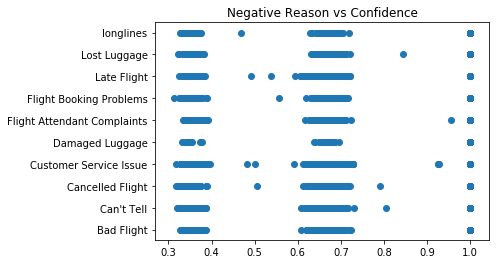

In [192]:

sns.stripplot(x="negativereason_confidence", y="negativereason", data=tweet)
plt.title('Negative Reason vs Confidence')
plt.show()

plt.scatter(tweet.negativereason_confidence, tweet.negativereason)
plt.title('Negative Reason vs Confidence')
plt.show()
#From both the plots we can see that excluding "CAN'T TELL"(i.e indecisive), 
#the two main negative reasons are "LATE FLIGHT" & "CUSTOMER SERVICE ISSUES".

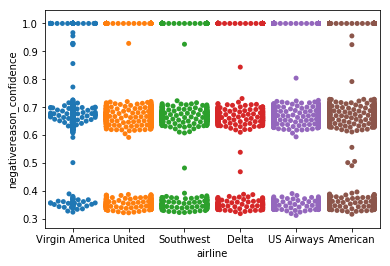

In [202]:
sns.swarmplot(x="airline", y="negativereason_confidence",  data=tweet)
plt.show() 
#From this swarmplot we can say that Virgin American Airlines recieved the least negative reviews.

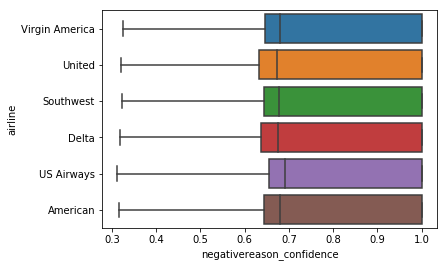

In [134]:
sns.boxplot(x="negativereason_confidence", y="airline",  data=tweet)
plt.show()

In [122]:
tweet.airline.value_counts()

United            1375
US Airways        1067
American          1004
Southwest          646
Delta              503
Virgin America     110
Name: airline, dtype: int64

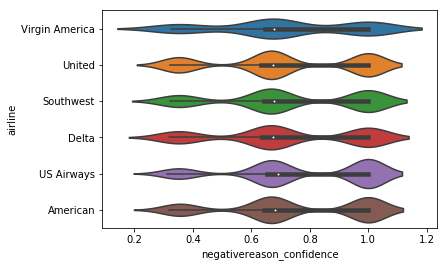

In [138]:
sns.violinplot(x="negativereason_confidence", y="airline",  data=tweet)
plt.show()

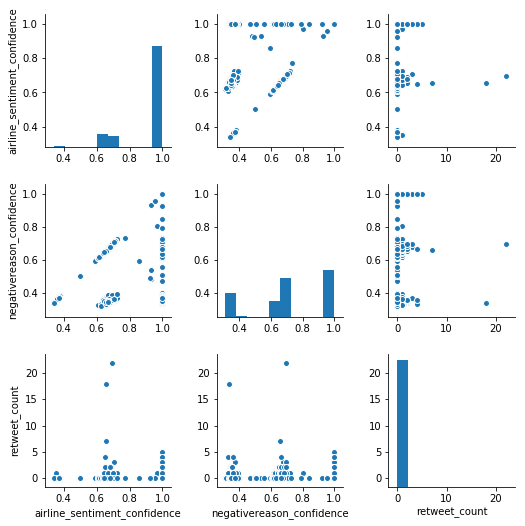

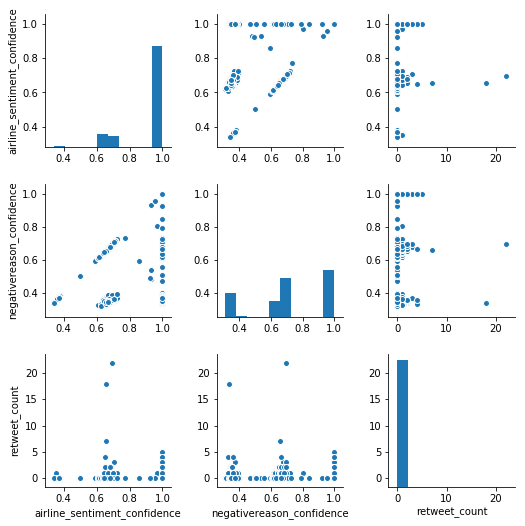

In [204]:
sns.pairplot(tweet)
plt.show()

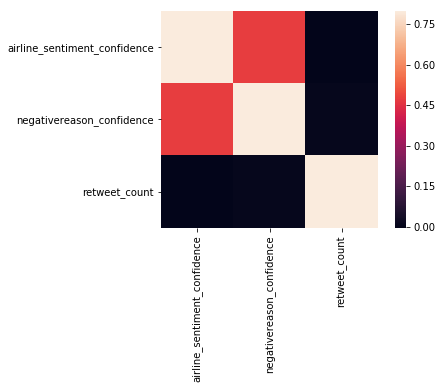

In [211]:
corrmat = tweet.corr()
sns.heatmap(corrmat, vmax = 0.8, square=True)
plt.show()

In [167]:
x = np.mean(tweet[retweet_count[:,0]])

NameError: name 'retweet_count' is not defined

In [179]:
type(tweet['retweet_count']) #this shows that the type of this column is a panda series.

pandas.core.series.Series

In [180]:
type(tweet[['retweet_count']]) #by using double square brackets, we use the data as a DataFrame.

pandas.core.frame.DataFrame

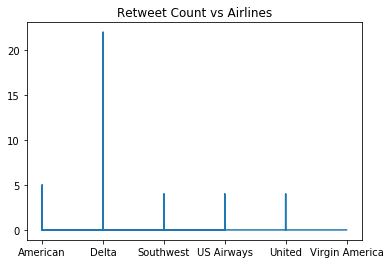

In [188]:
plt.plot(tweet.airline, tweet.retweet_count)
plt.title('Retweet Count vs Airlines')
plt.show() #this line plot shows that for Delta airlines, maximum number of people have retweeted.

In [212]:
np.corrcoef(tweet.airline_sentiment_confidence, tweet.negativereason_confidence)
#These two columns are correlated

array([[ 1.        ,  0.47563819],
       [ 0.47563819,  1.        ]])

In [219]:
np.std(tweet.negativereason_confidence) #standard devation

0.2384821827142756

In [220]:
tweet.describe()

,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,4705.000000,4705.000000,4705.000000
mean,0.930696,0.728429,0.088417
std,0.140364,0.238508,0.542657
min,0.339400,0.312200,0.000000
25%,1.000000,0.643700,0.000000
50%,1.000000,0.679700,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000
